# Heart Disease Classification - Toby Liang

## Importing Essential Libraries

In [47]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data and Data Summary

In [3]:
dataset = pd.read_csv("./data/heart_disease.csv")

In [4]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Fields Explained
- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol**: The person's cholesterol measurement in mg/dl
- **fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- **restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach**: The person's maximum heart rate achieved
- **exang**: Exercise induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
- **slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca**: The number of major vessels (0-3)
- **thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target**: Heart disease (0 = no, 1 = yes)

In [5]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data contains 303 examples with 13 features and 1 binary label

In [6]:
dataset.shape

(303, 14)

In [7]:
dataset.target.unique()

array([1, 0])

## Data Visualization

### Target

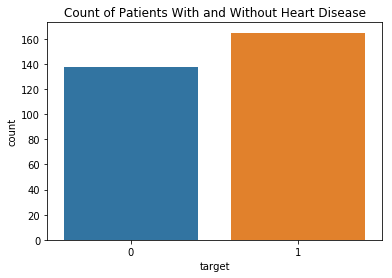

In [8]:
plt.title("Count of Patients With and Without Heart Disease")
sns.countplot(dataset.target)
plt.show()

In [9]:
dataset.target.describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

*Slightly more subjects (54.46%) have heart disease than not.*

### Sex

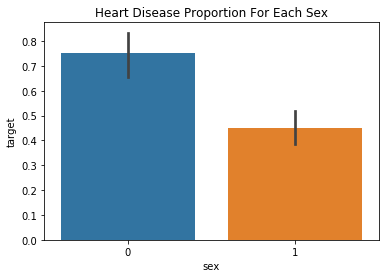

In [35]:
plt.title("Heart Disease Proportion For Each Sex")
sns.barplot(dataset.sex, dataset.target)
plt.show()

*Heart disease occurs significanly more frequently in female subjects than male subjects.*

### Chest Pain

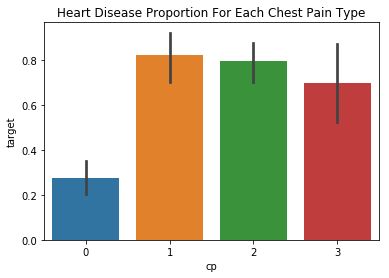

In [36]:
plt.title("Heart Disease Proportion For Each Chest Pain Type")
sns.barplot(dataset.cp, dataset.target)
plt.show()

*Heart disease occurs significantly less in patients with typical angina while proportions for patients with other chest pains are quite high (70%-80%).*

### Fasting Blood Sugar

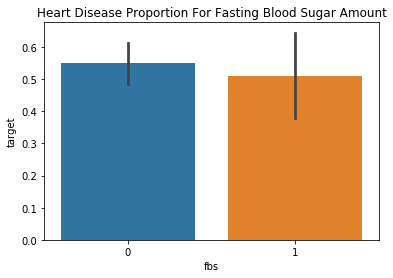

In [37]:
plt.title("Heart Disease Proportion For Fasting Blood Sugar Amount")
sns.barplot(dataset.fbs, dataset.target)
plt.show()

*Subjects with resting blood sugar of less than 120 mg/dl are slightly more likely to have heart disease.*

### Resting ECG

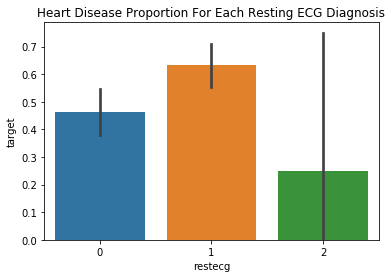

In [38]:
plt.title("Heart Disease Proportion For Each Resting ECG Diagnosis")
sns.barplot(dataset.restecg, dataset.target)
plt.show()

*Subjects with ST-T wave abnormality are more likely to have heart disease.*

### Exercise Induced Angina

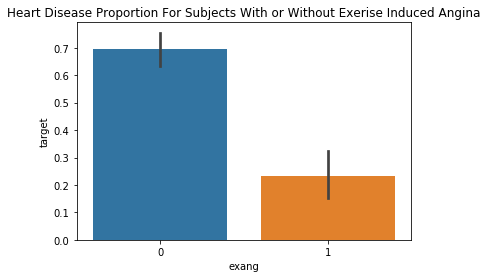

In [41]:
plt.title("Heart Disease Proportion For Subjects With or Without Exerise Induced Angina")
sns.barplot(dataset.exang, dataset.target)
plt.show()

*Subjects without exercise induced angina are significanly more likely to have heart disease.*

### Slope of the Peak Exercise ST Segment

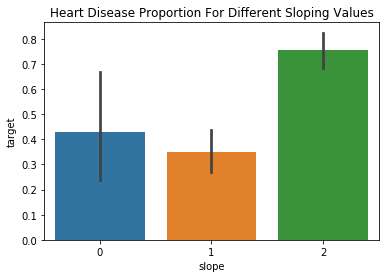

In [42]:
plt.title("Heart Disease Proportion For Different Sloping Values")
sns.barplot(dataset.slope, dataset.target)
plt.show()

*Subjects with a flat slope have a significantly higher change of heart disease.*

### Number of Major Blood Vessels

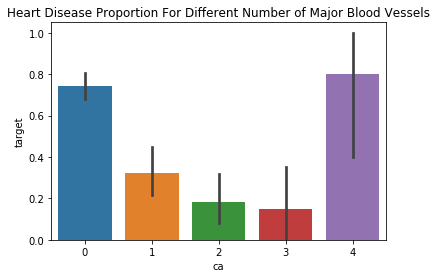

In [43]:
plt.title("Heart Disease Proportion For Different Number of Major Blood Vessels")
sns.barplot(dataset.ca, dataset.target)
plt.show()

### Thalassemia

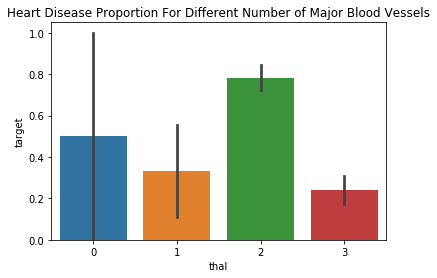

In [45]:
plt.title("Heart Disease Proportion For Different Number of Major Blood Vessels")
sns.barplot(dataset.thal, dataset.target)
plt.show()

## Data Preprocessing

In [66]:
features = dataset.drop("target", axis = 1)
label = dataset.target

x_train, x_test, y_train, y_test = train_test_split(features, label, train_size = 0.8, test_size = 0.2)

In [67]:
x_train.shape

(242, 13)

In [68]:
len(y_train)

242

In [69]:
x_test.shape

(61, 13)

In [70]:
len(y_test)

61